In [3]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

# Package to implement Random Forest
from sklearn.ensemble import RandomForestClassifier
# Package for Regression
# from sklearn.ensemble import RandomForestRegressor

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold 

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [4]:
# Load dataset as dataframe
mobile_df = pd.read_csv('mobile.csv')
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,Medium cost
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,High cost
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,High cost
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,High cost
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,Medium cost


In [8]:
# Dropping null values
mobile_df.dropna(inplace = True)
mobile_df.info()

mobile_df.replace({'Yes': 1, 'No': 0}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,Medium cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,High cost
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,High cost
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,High cost
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,Medium cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,Low cost
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,High cost
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,Very high cost
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,Low cost


In [11]:
# Output column for prediction
output = mobile_df['price_range'] 

# Input features (excluding year column)
features = mobile_df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']] 

features.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [12]:
# Data partitioning into training and testing
traindt_X, testdt_X, traindt_y, testdt_y = train_test_split(features, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf.fit(traindt_X, traindt_y)

DecisionTreeClassifier(random_state=0)

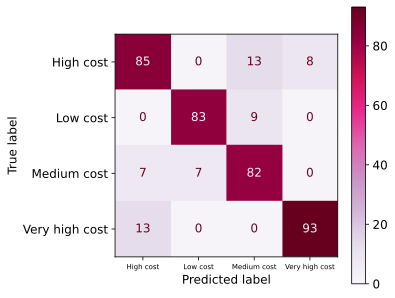

In [30]:
# Predictions on test set
y_pred_dt = clf.predict(testdt_X)

# Now generate confusion matrix
cm = confusion_matrix(testdt_y, y_pred_dt, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})
plt.xticks(fontsize = 7)

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

In [14]:
# Generating Classification Report
report = classification_report(testdt_y, y_pred_dt, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report2.csv') 

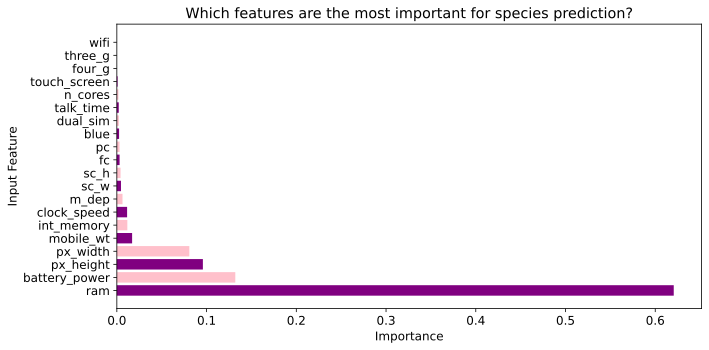

In [15]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(traindt_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp.svg");

In [31]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle1 = open('decision_tree_mobile.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle1) 

# Close the file
dt_pickle1.close() 

In [47]:
# Selecting data correponding to Input Features X and Outcome y
X = mobile_df.drop(columns=['price_range'])
y = mobile_df['price_range']


# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [48]:
# Define your model
classifier = RandomForestClassifier(random_state = 42)

# Start with an initial guess for parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [49]:
# Creating folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

In [50]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [37]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.8547277339361389
Initial parameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 14}


In [51]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [11, 12, 13],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [180, 200, 220]
}

pprint(param_grid)

# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

{'max_depth': [11, 12, 13],
 'min_samples_leaf': [2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [180, 200, 220]}


In [52]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Training time: 50.018412590026855s


In [53]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.8722989678052313
Improved parameters:  {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 180}


In [60]:
y_pred = model_cv.predict(test_X)

# Generating Classification Report
report2 = classification_report(test_y, y_pred, output_dict = True)
report2_df = pd.DataFrame(report2)
report2_df

# Save the report as a CSV File
report2_df.to_csv('class_report3.csv')

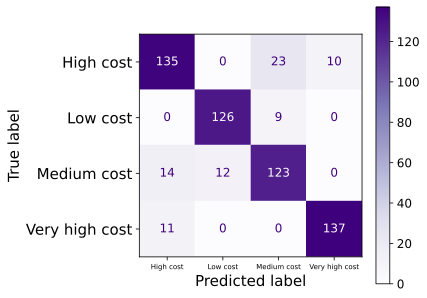

In [58]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = model_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_cv.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})
plt.xticks(fontsize = 7)

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);

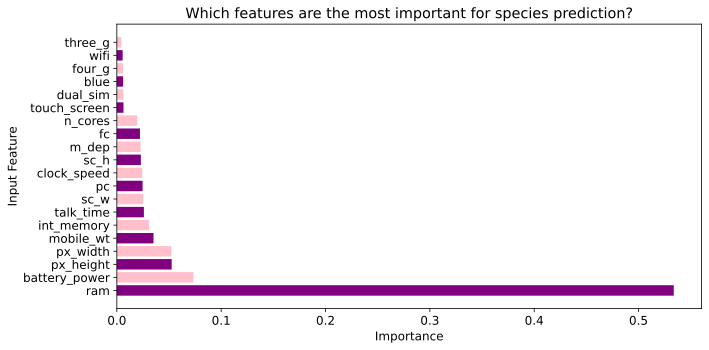

In [59]:
# Storing importance values from the best fit model
importance = model_cv.best_estimator_.feature_importances_

# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp.svg");

In [42]:
# Save the model to your local machine
filename = 'rf_mobile.sav'
pickle.dump(model_cv, open(filename, 'wb'))